Empezaremos utilizando datasets creados artificialmente que se encuentran localizados en la carpeta **datasets**, y dentro de la carpeta habrá 3 subcarpetas procedentes de los 3 tipos de encuestas:

* Autofinforme: **datasets/autoinforme/v1**
* Familia: **datasets/familia/v1**
* Profesionales: **datasets/profesional/v1**

Como el clasificador sólo entiende tipos numéricos, todos los valores de los datasets son codificados a valores númericos.

In [302]:
BAYES_NETWORK_STATE_NAMES = {
    'Curso':['PRIMARIA', 'ESO', 'BACHILLERATO', 'UNIVERSIDAD', 'FORMACION PROFESIONAL'], 
    'Sexo asignado':['HOMBRE', 'MUJER', 'OTRO'], 
    'Transgenero':['SI','NO','NO ESTOY SEGURO DE SER TRANS', 'NO ESTOY SEGURO DE LO QUE SE PREGUNTA'], 
    'Edad':['MENOR DE 12', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', 'MAYOR DE 21'], 
    'Situacion laboral padre':['NO TRABAJA', 'TRABAJA', 'PENSIONADO'], 
    'Situacion laboral madre': ['NO TRABAJA', 'TRABAJA', 'PENSIONADO'], 
    'Nivel profesional padre':['BAJO', 'MEDIO', 'ALTO'], 
    'Nivel profesional madre':['BAJO', 'MEDIO', 'ALTO'],
    'Nivel promedio del rendimiento academico':['INSUFICIENTE', 'SUFICIENTE', 'NOTABLE', 'SOBRESALIENTE', 'EXTRAORDINARIO'],
    'Nivel de autopercepcion masculina':['0','1','2','3','4','5','6'],
    'Nivel de autopercepcion femenina':['0','1','2','3','4','5','6'],
    'Nivel de heteropercepcion masculina':['0','1','2','3','4','5','6'],
    'Nivel de heteropercepcion femenina':['0','1','2','3','4','5','6'],
    'Altura':['MENOS DE 149', '150-159', '160-169','170-179','180-189','MAS DE 190'],
    'Peso':['MENOS DE 49', '50-59', '60-69','70-79','80-89','MAS DE 90'],
    'Tratamiento psiquiatrico previo':['SI','NO'],
    'Presenta enfermedad cronica':['SI','NO'],
    'Bullying victima':['SI','NO'],
    'Bullying perpetrador':['SI','NO'],
    'Cyberbullying victima':['SI','NO'],
    'Cyberbullying perpetrador':['SI','NO'],
    'Adiccion/abuso alcohol':['SI','NO'],
    'Adiccion/abuso sustancias':['SI','NO'],
    'Adiccion/abuso Internet':['SI','NO'],
    'Problemas interiorizados':['SI','NO'],
    'Problemas exteriorizados':['SI','NO'],
    'Problemas de contexto':['SI','NO'],
    'Problemas recursos psicologicos':['SI','NO'],
    'Percepcion de discriminacion':['SI','NO'],
    'Fuente de discriminacion':['EDAD','RAZA','DISCAPACIDAD','GENERO','ORIENTACION SEXUAL'],
    'Nivel de resistencia/resiliencia':['1','2','3','4','5'],
    'Nivel de regulacion positiva':['1','2','3','4','5'],
    'Nivel de regulacion negativa':['1','2','3','4','5'],
    'Atrapamiento interno':['SI','NO'],
    'Atrapamiento externo':['SI','NO'],
    'Nivel percibido de derrota o fracaso':['BAJO','MEDIO', 'ALTO'],
    'Sentido de pertenencia frustada':['SI','NO'],
    'Percepcion de ser una carga':['SI','NO'],
    'Autoeficiencia para el suicidio':['SI', 'NO'],
    'Madre adolescente':['SI', 'NO'],
    'Padre adolescente':['SI', 'NO'],
    'Padres divorciados':['SI', 'NO'],
    'Familia monoparental':['SI', 'NO'],
    'Tratamiento psicologico padre/madre':['SI', 'NO'],
    'Adiccion padre/madre':['SI', 'NO'],
    'Relaciones conflictivas hijo-padre/madre':['SI', 'NO'],
    'Familia reconstruida':['SI', 'NO'],
    'Busqueda informacion autolesion':['SI', 'NO'],
    'Compartir en RRSS pensamiento autolesion':['SI', 'NO'],
    'Peticion ayuda en Internet':['SI', 'NO'],
    'Contagio':['SI', 'NO'], 
    'Tener conocidos que comparten autolesion en Internet':['SI', 'NO'],
    'Via de contacto para RRSS':['SI', 'NO'],
    'Contacto informacion autolesion':['SI', 'NO'],
    'Denuncia autolesion Internet':['SI', 'NO'],
    'Aceptacion/rechazo parental':['ACEPTACION', 'RECHAZO'],
    'Control parental':['SI', 'NO'],
    'Situacion economica familiar precaria':['SI', 'NO'],
    'Estudios de la madre':['SI', 'NO'],
    'Estudios del padre':['SI', 'NO'],
    'Supervision parental insuficiente':['SI', 'NO'],
    'Maltrato al adolescente':['SI', 'NO'],
    'Duelo':['SI', 'NO'],
    'Ingreso familiar mensual':['MENOS DE 499', '500-999','1000-1499','2000-2499','MAS DE 2500'],
    'Desenlace':['COMUNICACION', 'DESEO','IDEACION','PLANIFICACION','INTENCION','FINALIDAD']
}

# Parámetros de entrenamiento

Para empezar, establecemos los siguientes parámetros del entrenamiento:

* _modelType_: tipo del modelo que se tiene que crear y entrenar.
* _datasetName_: nombre del dataset.
* _test_size_:indica el tipo de división que tendrá el dataset. Por ejemplo, si test_size = 0.3, el 70% del dataset se utilizará para el entrenamiento del modelo, mientras que el 30% se usará para el testeo.
* _average_: parámetro que especifica cómo se calcularán las métricas de la prueba del rendimiento. Puede tener los valores weighted y micro. _micro_ calcula la métrica global a través de todas las clases, sin tener en cuenta la distribución de clases. Por lo tanto, los resultados de accuracy, precision, recally f1_score tendrán el mismo resultado. _weighted_ sí tiene en cuenta la distribución de todas las clases, en este caso, de las clases NINGUNO,AUTOLESION,COMUNICACION, DESEO,IDEACION,PLANIFICACION e INTENCION. Calcula la métrica de cada clase y luego la pondera según el número de instancias reales en cada clase. 


In [303]:
# Establecer nombre del dataset y el tipo de modelo para las pruebas
# Posibles valores: autoinforme, familia o profesional
modelType = 'profesional'
datasetName = 'dataset_v1_5.csv'
test_size = 0.25
average = 'micro'

# Preparación del dataframe
A continuación, cargamos el respectivo dataframe de la carpeta especificada.

Extraemos toda la información del dataset y lo guardamos en un dataframe de la librería *Pandas*. El contenido del dataframe es el siguiente:

In [304]:
import pandas as pd
df = pd.read_csv('datasets/' + modelType + '/v1/' + datasetName)

df

,Index,Nombre,Edad,Curso,Peso,Altura,Sexo asignado,Transgenero,Madre adolescente,Padre adolescente,...,Relaciones conflictivas hijo-padre/madre,Familia reconstruida,Situacion economica familiar precaria,Estudios de la madre,Estudios del padre,Supervision parental insuficiente,Maltrato al adolescente,Duelo,Ingreso familiar mensual,Desenlace
0,1,Marcos Martinez,10,Primaria,89.71,118.08,Otro,No estoy seguro de ser trans,No,Si,...,No,No,No,No,No,Si,No,Si,2155,Comunicacion
1,2,Luka Perez,11,Primaria,74.42,159.45,Otro,No estoy seguro de lo que se pregunta,No,Si,...,No,Si,Si,Si,No,Si,Si,No,933,Finalidad
2,3,Lisa Anderson,22,Universidad,60.31,111.79,Otro,Si,Si,Si,...,No,No,No,No,No,No,Si,Si,2460,Deseo
3,4,Charles Evans,10,Primaria,60.51,112.09,Otro,No estoy seguro de lo que se pregunta,Si,Si,...,No,Si,Si,Si,No,Si,Si,No,2240,Planificacion
4,5,Luka Lewis,16,ESO,80.58,127.45,Mujer,No estoy seguro de lo que se pregunta,Si,No,...,No,Si,No,No,Si,Si,Si,No,2533,Ideacion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Declan Ramsey,17,ESO,68.99,171.99,Otro,No estoy seguro de ser trans,No,No,...,No,No,No,Si,Si,Si,No,No,1822,Planificacion
9996,9997,Landon Russell,23,Formacion Profesional,67.64,117.27,Mujer,No estoy seguro de lo que se pregunta,Si,No,...,No,Si,Si,No,No,No,Si,No,1822,Comunicacion
9997,9998,Cristian Gonzalez,13,ESO,60.13,197.15,Hombre,No estoy seguro de ser trans,No,No,...,Si,Si,No,Si,Si,Si,No,Si,3882,Deseo
9998,9999,Gero Hernandez,21,Universidad,69.01,147.19,Mujer,Si,Si,Si,...,Si,Si,No,No,Si,Si,Si,No,598,Comunicacion


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Index                                     10000 non-null  int64  
 1   Nombre                                    10000 non-null  object 
 2   Edad                                      10000 non-null  int64  
 3   Curso                                     10000 non-null  object 
 4   Peso                                      10000 non-null  float64
 5   Altura                                    10000 non-null  float64
 6   Sexo asignado                             10000 non-null  object 
 7   Transgenero                               10000 non-null  object 
 8   Madre adolescente                         10000 non-null  object 
 9   Padre adolescente                         10000 non-null  object 
 10  Padres divorciados                 

## Decodificación del dataframe
Preparamos el dataframe para convertir los valores de las columnas a valores numéricos y borrar aquellas columnas que no son necesarias para la clasificación.

Se elimina la columna Index, debido a que es una columna que no influye en la creación del modelo. 

In [306]:
import numpy as np

def codeAgeColumn(age):
    if age < 12:
        return 'MENOR DE 12'
    elif age > 21:
        return 'MAYOR DE 21'
    else:
        return str(age)

def codeHeightColumn(height):
    if height <= 149:
        return "MENOS DE 149"
    elif height >= 150 or height < 160:
        return "150-159"
    elif height >= 160 or height < 170:
        return "160-169"
    elif height >= 170 or height < 180:
        return "170-179"
    elif height >= 180 or height < 190:
        return "180-189"
    elif height >= 190:
        return "MAS DE 190"
    else:
        return False

def codeWeightColumn(weight):
    if weight <= 49:
        return "MENOS DE 49"
    elif weight >= 50 or weight < 60:
        return "50-59"
    elif weight >= 60 or weight < 70:
        return "60-69"
    elif weight >= 70 or weight < 80:
        return "70-79"
    elif weight >= 80 or weight < 90:
        return "80-89"
    elif weight >= 90:
        return "MAS DE 90"
    else:
        return False

def codeMonthlyFamiliarIncome(income):
    if income <= 499:
        return "MENOS DE 499"
    elif income >= 500 or income < 1000:
        return "500-999"
    elif income >= 1000 or income < 1500:
        return "1000-1499"
    elif income >= 1500 or income < 2000:
        return "1500-1999"
    elif income >= 2000 or income < 2500:
        return "2000-2499"
    elif income >= 2500:
        return "MAS DE 2500"
    else:
        return False

def changeValuesToNumeric(df):
    newData = df.apply(lambda x: x.astype(str).str.upper())

    for key, values in BAYES_NETWORK_STATE_NAMES.items():
        if key in newData and key != 'Desenlace':
            newData[key] = newData[key].apply(lambda x: values.index(x))

    
    return newData

def codeDataset(df):
    newDF = df

    # Eliminamos las columnas Index y Nombre, que no son necesarios
    newDF = newDF.drop(['Index', 'Nombre'], axis=1)

    # Metemos los valores dentro de rangos
    newDF['Edad'] = newDF['Edad'].apply(codeAgeColumn)
    newDF['Altura'] = newDF['Altura'].apply(codeHeightColumn)
    newDF['Peso'] = newDF['Peso'].apply(codeWeightColumn)

    # La columna 'Ingreso familiar mensual' sólo se encuentra en los datasets de profesionales
    if 'Ingreso familiar mensual' in newDF:
        newDF['Ingreso familiar mensual'] = newDF['Ingreso familiar mensual'].apply(codeMonthlyFamiliarIncome)
    
    # Codificamos los valores de todas las columnas a vlores numéricos
    newDF = changeValuesToNumeric(newDF)

    return newDF

In [307]:
df = codeDataset(df)
df

,Edad,Curso,Peso,Altura,Sexo asignado,Transgenero,Madre adolescente,Padre adolescente,Padres divorciados,Familia monoparental,...,Relaciones conflictivas hijo-padre/madre,Familia reconstruida,Situacion economica familiar precaria,Estudios de la madre,Estudios del padre,Supervision parental insuficiente,Maltrato al adolescente,Duelo,Ingreso familiar mensual,Desenlace
0,0,0,1,0,2,2,1,0,0,1,...,1,1,1,1,1,0,1,0,1,COMUNICACION
1,0,0,1,1,2,3,1,0,0,0,...,1,0,0,0,1,0,0,1,1,FINALIDAD
2,11,3,1,0,2,0,0,0,1,1,...,1,1,1,1,1,1,0,0,1,DESEO
3,0,0,1,0,2,3,0,0,0,0,...,1,0,0,0,1,0,0,1,1,PLANIFICACION
4,5,1,1,0,1,3,0,1,1,0,...,1,0,1,1,0,0,0,1,1,IDEACION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,1,1,1,2,2,1,1,1,0,...,1,1,1,0,0,0,1,1,1,PLANIFICACION
9996,11,4,1,0,1,3,0,1,0,0,...,1,0,0,1,1,1,0,1,1,COMUNICACION
9997,2,1,1,1,0,2,1,1,0,1,...,0,0,1,0,0,0,1,0,1,DESEO
9998,10,3,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,COMUNICACION


## División del dataframe

De este dataframe, se dividirán los datos de entrenamiento y de prueba. La división se hará utilizando los parámetros de average y test_size, que se establecieron al principio de este cuaderno.

*X* representa las características del conjunto de datos

*y* representa las etiquetas del conjunto de datos.

random_state=1 para proporcionar una semilla para la generación de números aleatorios. De esta manera, la división no es la misma cada vez que se ejecute la función, lo que asegura que la división sea reproducible.



In [308]:
from sklearn.model_selection import train_test_split

numberColumns = len(df.columns) 

X, y = df.values[:,0:(numberColumns - 1)], df.values[:,(numberColumns - 1)]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=test_size, random_state=1, stratify=y)

# Carga y entrenamiento del modelo seleccionado
Entrenamos al modelo usando el clasificador Näive-Bayes. En este caso, no es necesario especificar exactamente la estructura del modelo, porque los clasificadores de SciKit interpretan por defecto que todas las variables apuntan directamente a una sola.

Primero se comprobará si dentro de la carpeta de scripts ya existe un clasificador previo. Si existe, se carga, sino se crea uno nuevo. 

De esta manera, no tendremos que estar partiendo siempre de un clasificador vacío, sino que se entrena el clasificador previamente creado. 

In [309]:
from sklearn.naive_bayes import GaussianNB
import pickle
import os  

filePath = 'configFilesJupyter/' + modelType + '/'
filename = filePath + 'model_' + modelType + '_v1.sav'

# Si existe un modelo previamente guardado, se carga, sino, se crea uno nuevo
if os.path.exists(filename):
    print('Existe un modelo anterior')
    file = pickle.load(open(filename, 'rb'))
    clf_NB = file.get('model', None)
    print(file.get('metrics', None))
    print('Modelo cargado')
else:
    print('Nuevo modelo')
    clf_NB = GaussianNB()

classNames = np.unique(df['Desenlace'].to_numpy())
clf_NB.partial_fit(X_train, y_train, classNames)

if os.path.exists(filePath) == False:
    os.mkdir(filePath)
    
#clf_NB = GaussianNB()
#clf_NB.fit(X_train, y_train)
# Guardamos el modelo en un archivo .pickle
pickle.dump(clf_NB, open(filename, 'wb'))


Existe un modelo anterior
{'accuracy': 0.1528, 'precision': np.float64(0.1528), 'recall': np.float64(0.1528), 'f1_score': np.float64(0.1528)}
Modelo cargado


# Predicción del modelo entrenado
Hacemos una predicción de los datos de testeo X_test

In [310]:
# Hacemos una prediccion de los datos de testing
y_pred = clf_NB.predict(X_test)

compareDF = pd.DataFrame()

compareDF['Real Result'] = y_test
compareDF['Predicted Result'] = y_pred
compareDF.head()

,Real Result,Predicted Result
0,COMUNICACION,INTENCION
1,DESEO,PLANIFICACION
2,IDEACION,IDEACION
3,FINALIDAD,IDEACION
4,PLANIFICACION,PLANIFICACION


# Matriz de Confusión
Creamos la matriz de confusión. En este caso, los posibles resultados podían ser 0, 1 y 2 (columna *target*) --> setosa, versicolor, virginica (columna *target_names*). Por lo tanto, la matriz de resultado no sería una matriz 2x2 convencional, sino una 3x3.

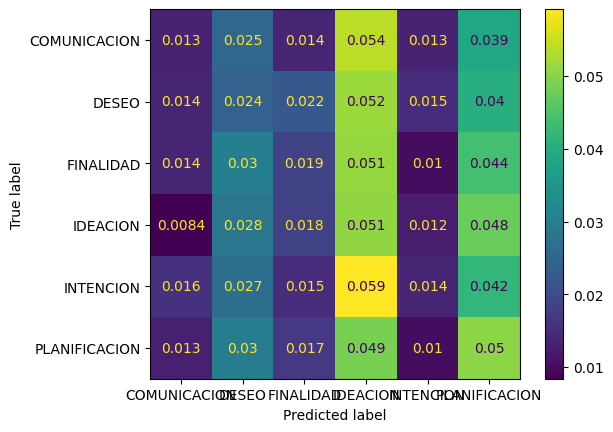

In [311]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import sys

classNames = np.unique(df['Desenlace'].to_numpy())

cm = confusion_matrix(y_test, y_pred, labels=classNames, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classNames)

fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax)
plt.show()



# Cálculo de métricas del entrenamiento

Para calcular el rendimiento del entrenamiento, se calcularán 4 métricas distintas.

* Accuracy
* Precision
* Recall
* F1

In [312]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average=average)
recall = recall_score(y_true=y_test, y_pred=y_pred, average=average)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average=average)

print('Exactitud - Accuracy: %.3f' % accuracy)
print('Precision: %.3f' % precision)
print('Sensibilidad - Recall: %.3f' % recall)
print('F1: %.3f' % f1)

Exactitud - Accuracy: 0.171
Precision: 0.171
Sensibilidad - Recall: 0.171
F1: 0.171


# Estimación del error del entrenamiento

Para calcular la estimación del error, se utilizó la validación cruzada. 

La validación cruzada es una técnica para asegurar que el modelo entrenado se ajusta correctamente a los datos de entrenamiento y que además puede predecir correctamente datos no vistos. 

De esta manera, podemos generar una estimación más robusta del error.

En este caso, vamos a utilizar los valores por defecto. 

In [313]:
from sklearn.model_selection import cross_validate

cv_scores = cross_validate(clf_NB, X, y, cv=5, scoring='accuracy')

# Imprimir los resultados
print("Desviación estándar de los scores:", np.std(cv_scores['test_score']))

Desviación estándar de los scores: 0.007183313998427195


# Guardar el modelo

Guardamos el modelo para que se puedan cargar y usar en cualquier momento.


In [314]:

from datetime import datetime

filePath = 'configFilesJupyter/'+modelType+'/'
#filename = filePath + 'model_autoinforme.sav'

if os.path.exists(filePath) == False:
    os.mkdir(filePath)
    
data = {
    'model': clf_NB,
    'metrics': {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    },
}

now = datetime.now()
versionDateTime = now.strftime("%Y%m%d%H%M%S")
filename = filePath + '/' + 'model_'+ modelType +'_v1.sav'


# Guardamos el modelo en un archivo .pickle
pickle.dump(data, open(filename, 'wb'))